In [1]:
import random
from collections import defaultdict, OrderedDict
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = (20, 10)

Шел 1654 год, а у французского дворянина Антуана Гомбальда, шевалье де-Мере, была проблема. Он был заядлым игроком, и любил играть в игру, в которой ставил на то, что если он бросит одну кость четыре раза, по крайней мере, один раз выпадет шестерка. На этой игре он заработал неплохие деньги, но его друзьям надоело проигрывать, и впредь они отказывались с ним играть. В поисках новых способов обобрать своих друзей, он изобрел новую игру, которая, как он считал, использовала то же правило вероятности, что и предыдущая. В новой игре он ставил на то, что если он кинет две кости двадцать четыре раза, то, по крайней мере, один раз выпадет двенадцать. Сначала друзья отнеслись к новой игре с подозрением, но уже скоро он начала им нравится, потому что шевалье начал быстро терять свои деньги! Он не мог понять, что происходит, ведь по его подсчетам обе игры использовали одно и то же правило вероятности.

Первая игра: бросая одну кость четыре раза, шевалье выигрывал, если выпадала, покрайней мере, одна шестерка. Шевалье объяснял, что вероятность выпадения 6 на одной кости равнялся 1/6, и поэтому, если он бросит кость четыре раза, шанс на выигрыш будет 4 х (1/6) = 4/6 = 66%, что объясняет, почему он так часто побеждал.

Вторая игра: бросая две кости двадцать четыре раза, шевалье выигрывал, если, по крайней мере, один раз выпадало 12. Шевалье посчитал, что шанс выпадения 12 (две шестерки) на двух костях равен 1/36. Затем он пришел к тому, что если бросить кости 24 раза, вероятность будет
следующей: 24 х (1/36) = 24/36 = 2/3 = 66%. Та же вероятность, что и в первой игре.

### Вероятность того, что из 4 бросков хотя бы один раз выпадет 6

In [3]:
1 - (5 / 6) ** 4 

0.5177469135802468

In [4]:
success = 0
every = 0
for i in range(1111, 6667):
    if '7' not in str(i) and '8' not in str(i) and '9' not in str(i) and '0' not in str(i):
        every += 1
        if '6' in str(i):
            success += 1
success / every

0.5177469135802469

In [5]:
iterations = 1000000
success = 0
for i in range(iterations):
    for j in range(4):
        if (random.randint(1, 6) == 6):
            success += 1
            break
success / iterations

0.518239

### Вероятность того, что из 24 бросков 2-х кубиков хотя бы один раз выпадет 12

In [6]:
1 - (35 / 36) ** 24

0.4914038761309034

In [7]:
def run_iter(f, n=1000000):
    result = defaultdict(int)
    for i in range(n):
        result[f()] += 1
    return OrderedDict(sorted(result.items()))


def dice_throw():
    return random.randint(1, 6) + random.randint(1, 6)


def plot_res(result, title, n=1000000):
    x, y = result.keys(), [value / n for value in result.values()]
    plt.title(title)
    plt.bar(x, y)

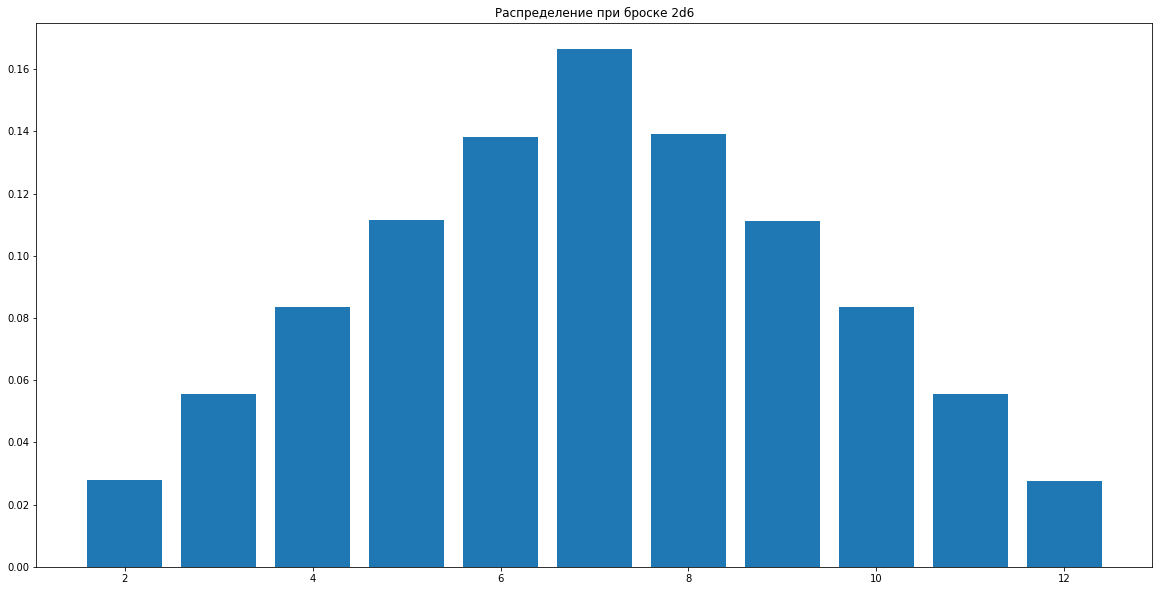

In [8]:
plot_res(run_iter(dice_throw), 'Распределение при броске 2d6')

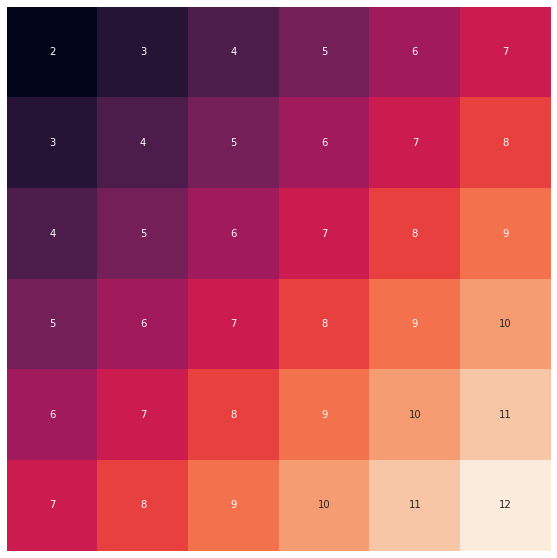

In [9]:
sns.heatmap(np.array([[i + j for j in range(1, 7)] for i in range(1, 7)]), annot=True, square=True, xticklabels=False, yticklabels=False, cbar=False)

In [10]:
iterations = 1000000
success = 0
for i in range(iterations):
    for j in range(24):
        if (random.randint(1, 6) + random.randint(1, 6) == 12):
            success += 1
            break
success / iterations

0.491582